In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import player_formatter as formatter
import styler

In [12]:
background_color = styler.background_color()
axis_color = styler.axis_color()
label_color = styler.label_color()
signature_color = styler.signature_color()
annotation_color = styler.annotation_color()

In [13]:
df = pd.read_csv('Data/passing.csv')

In [14]:
formatted_df = formatter.format_data(df)

## Select Data

In [15]:
# https://fbref.com/en/comps/9/passing/Premier-League-Stats

position = 'MF' # GK, DF, MF, FW
x_col = '1/3'
y_col = 'Prog'
min_x_val = 5.25
min_y_val = 4.75
space = 0.05

min_mins_played = 1000

In [21]:
x_axis_label = "Passes into final third (per 90)"
y_axis_label = "Progressive passes (per 90)"
graph_title = f"Progressive passes vs passes into final third Premier League Midfielders 2020/21 (>{min_mins_played} mins)"

source = "Fbref.com"

annotation_labels = [
    "Quadrant I:\nGood penetrative passers \nand ball progressors",
    "Quadrant II:\nGood ball progressors",
    "Quadrant III:\nAverage penetrative passers \nand ball progressors",
    "Quadrant IV:\nGood penetrative passers",
    f"Source:\n{source}"
]
annotation_points = [(10,6),(2,8),(3,2),(8,4),(9,2)]

signature_point = (10.5,2)

horizontal_lines = [min_y_val]
vertical_lines = [min_x_val]

## Graph

In [22]:
min_90s_played = min_mins_played/90

basic_columns = ['Player','Nation','Pos','Squad','Age']
interested_columns = ['90s', y_col, x_col]

filter_columns = basic_columns + interested_columns

for col in interested_columns:
    formatted_df[col] = pd.to_numeric(formatted_df[col])


subset_df = formatted_df[(formatted_df['Pos']==position) & (formatted_df['90s'] >= min_90s_played)]

subset_df = subset_df[filter_columns]

subset_df[x_col] = subset_df[x_col]/subset_df['90s']
subset_df[y_col] = subset_df[y_col]/subset_df['90s']

In [23]:
x = subset_df[x_col].reset_index(drop=True)
y = subset_df[y_col].reset_index(drop=True)
text = subset_df['Player'].reset_index(drop=True)

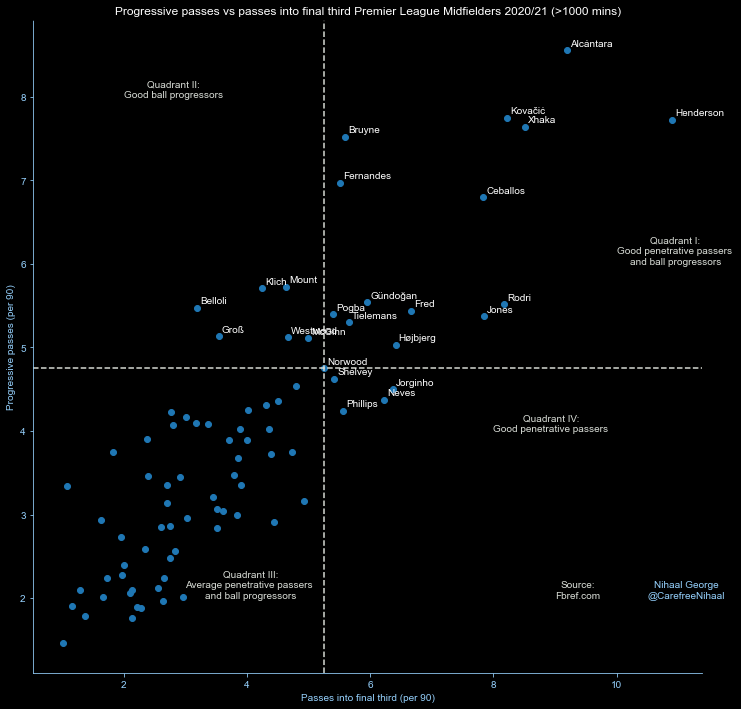

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel(x_axis_label)
ax.set_ylabel(y_axis_label)
sc = plt.scatter(x,y)
ax.set_title(graph_title, color=label_color)

fig = styler.set_styles_fig(fig)
ax = styler.set_styles_ax(ax)

plt.rcParams["font.family"] = "Arial"

for v in vertical_lines:
    plt.axvline(x=v, color=annotation_color, linestyle='--')

for h in horizontal_lines:
    plt.axhline(y=h, color=annotation_color, linestyle='--')

for i in range(len(annotation_labels)):
    ax.annotate(annotation_labels[i], annotation_points[i], color=annotation_color, ma='center')

ax.annotate("Nihaal George\n@CarefreeNihaal", signature_point, color=signature_color, ma='center')
    
for i, txt in enumerate(text):
    if x[i] >= min_x_val or y[i] >= min_y_val:
        ax.annotate(txt.split(' ')[-1], (x[i]+space,y[i]+space), color=label_color)